In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Profile comparisons

Look at the differences in the CC13 (ion chamber from IBA), Micro Diamond (PTW) and Photon diode (IBA) – what are the differences in the detectors and why might you use one over the other? I’d like you to look at Field Sizes: 4x4, 10x10 and 30x30 for each of the 5 depths. NOTE 30x30 not in all sets

## MicroDiamond

Raw file not correctly imported as multiIndex, appears to be related to incorrect handling of header, so do some work to get into multiIndex format

In [2]:
MicroDiamond_df_raw  = pd.read_table('6MV 100FSD Profiles MicroDiamond - RAW.csv', sep= ",", header=[1,4,5],  skiprows=[6]) # index_col=0,  .fillna(0).astype(float);
MicroDiamond_df_raw = MicroDiamond_df_raw.ix[:,1:]  # skip the first column

Get the column info required for multiIndex construction

In [3]:
tuples_list = MicroDiamond_df_raw.columns
cross_type, field_type, depth_mm = list(zip(*tuples_list))    # unzip the original columns index

In [4]:
cross_type_strings = [ "%s" % x for x in cross_type ]
field_type_strings = [ "%s" % x for x in field_type ]
depth_mm_strings = [ "%s" % x for x in depth_mm ]    # get lists of strings

In [5]:
tuples = list(zip(*[cross_type_strings, field_type_strings, depth_mm_strings]))  #zip back into a list of tuples containing strings

In [6]:
index_multi = pd.MultiIndex.from_tuples(tuples)  # get required multiindex
#index_multi

Now have all the columns as lists which can be used to manually create the multiIndex

In [7]:
MicroDiamond_df  = pd.read_table('6MV 100FSD Profiles MicroDiamond - RAW.csv', sep= ",", header=[1,4,5], skiprows=[6], index_col=0) # 
MicroDiamond_df.columns = index_multi
MicroDiamond_df.head()

Crossline                                                \
                 10 x 10 mm                                    20 x 20 mm   
                    15.0 mm 50.0 mm 100.0 mm 200.0 mm 300.0 mm    15.0 mm   
Coordinate [mm]:                                                            
-239                    NaN     NaN      NaN      NaN      NaN        NaN   
-238                    NaN     NaN      NaN      NaN      NaN        NaN   
-237                    NaN     NaN      NaN      NaN      NaN        NaN   
-236                    NaN     NaN      NaN      NaN      NaN        NaN   
-235                    NaN     NaN      NaN      NaN      NaN        NaN   

                                                      ...                  \
                                                      ...    200 x 200 mm   
                 50.0 mm 100.0 mm 200.0 mm 300.0 mm   ...        100.0 mm   
Coordinate [mm]:                                      ...                   
-239                 NaN      NaN      NaN      NaN   ...             NaN   
-238                 NaN      NaN      NaN      NaN   ...             NaN   
-237                 NaN      NaN      NaN      NaN   ...             NaN   
-236                 NaN      NaN      NaN      NaN   ...             NaN   
-235                 NaN      NaN      NaN      NaN   ...             NaN   

                                                                           \
                                   300 x 300 mm                             
                 200.0 mm 300.0 mm      15.0 mm 50.0 mm 100.0 mm 200.0 mm   
Coordinate [mm]:                                                            
-239                  NaN      NaN          NaN     NaN      NaN      NaN   
-238                  NaN      NaN          NaN     NaN      NaN      NaN   
-237                  NaN      NaN          NaN     NaN      NaN      NaN   
-236                  NaN      NaN          NaN     NaN      NaN      NaN   
-235                  NaN      NaN          NaN     NaN      NaN      NaN   

                              Inline           
                          60 x 60 mm           
                 300.0 mm    15.0 mm 300.0 mm  
Coordinate [mm]:                               
-239                  4.7        NaN      NaN  
-238                  4.8        NaN      NaN  
-237                  5.0        NaN      NaN  
-236                  5.1        NaN      NaN  
-235                  5.1        NaN      NaN  

[5 rows x 54 columns]

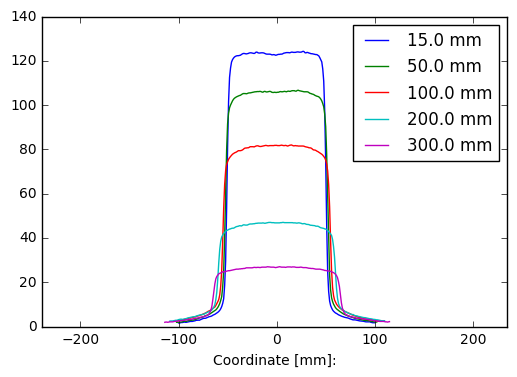

In [8]:
MicroDiamond_df['Crossline']['100 x 100 mm'].plot()

## Diode
Manually read file into multiIndex

In [9]:
Diode_df_raw  = pd.read_table('6MV Profiles Photon Diode  - RAW.csv', sep= ",",  header=[1,4,5], skiprows=[6]) # index_col=0,.fillna(0).astype(float);
#Diode_df.head()  # loaded data
Diode_df_raw = Diode_df_raw.ix[:,1:]  # skip the first column

tuples_list = Diode_df_raw.columns
cross_type, field_type, depth_mm = list(zip(*tuples_list))    # unzip the original columns index

#cross_type_strings, field_type_strings, depth_mm_strings = [], [], []  # clear the lists from memory

cross_type_strings = [ "%s" % x for x in cross_type ]
field_type_strings = [ "%s" % x for x in field_type ]
depth_mm_strings = [ "%s" % x for x in depth_mm ]    # get lists of strings

tuples = list(zip(*[cross_type_strings, field_type_strings, depth_mm_strings]))  #zip back into a list of tuples containing strings
index_multi = pd.MultiIndex.from_tuples(tuples)  # get required multiindex

Diode_df  = pd.read_table('6MV Profiles Photon Diode  - RAW.csv', sep= ",", header=[1,4,5], skiprows=[6], index_col=0) # 
Diode_df.columns = index_multi
Diode_df.head()

Crossline   (  Crossline   (  Crossline   (  Crossline   (  \
                 10 x 10 mm   ' 10 x 10 mm   ' 10 x 10 mm   ' 10 x 10 mm   '   
                    15.0 mm   C    50.0 mm   C   100.0 mm   C   200.0 mm   C   
Coordinate [mm]:                                                               
-179                    NaN NaN        NaN NaN        NaN NaN        NaN NaN   
-178                    NaN NaN        NaN NaN        NaN NaN        NaN NaN   
-177                    NaN NaN        NaN NaN        NaN NaN        NaN NaN   
-176                    NaN NaN        NaN NaN        NaN NaN        NaN NaN   
-175                    NaN NaN        NaN NaN        NaN NaN        NaN NaN   

                  Crossline   (   ...       Crossline                        \
                 10 x 10 mm   '   ...    100 x 100 mm          200 x 200 mm   
                   300.0 mm   C   ...        200.0 mm 300.0 mm      15.0 mm   
Coordinate [mm]:                  ...                                         
-179                    NaN NaN   ...             NaN      NaN          NaN   
-178                    NaN NaN   ...             NaN      NaN          NaN   
-177                    NaN NaN   ...             NaN      NaN          NaN   
-176                    NaN NaN   ...             NaN      NaN          NaN   
-175                    NaN NaN   ...             NaN      NaN          NaN   

                                                        Inline           \
                                                    60 x 60 mm            
                 50.0 mm 100.0 mm 200.0 mm 300.0 mm    15.0 mm 100.0 mm   
Coordinate [mm]:                                                          
-179                 NaN      NaN      NaN      4.0        NaN      NaN   
-178                 NaN      NaN      NaN      4.2        NaN      NaN   
-177                 NaN      NaN      NaN      4.2        NaN      NaN   
-176                 NaN      NaN      NaN      4.2        NaN      NaN   
-175                 NaN      NaN      NaN      4.3        NaN      NaN   

                           
                           
                 300.0 mm  
Coordinate [mm]:           
-179                  NaN  
-178                  NaN  
-177                  NaN  
-176                  NaN  
-175                  NaN  

[5 rows x 46 columns]

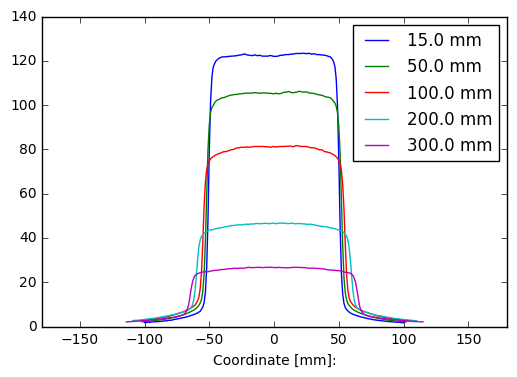

In [10]:
Diode_df['Crossline']['100 x 100 mm'].plot()

## CC13 - .13 CC ion chamber
Comes in as multiIndex correctly, not sure why this is different as raw text files look very similar

In [11]:
CC13_df  = pd.read_table('6X Profiles CC13 RAW.csv', sep= ",", index_col=0, header=[1,4,5], skiprows=[6]).fillna(0).astype(float);
CC13_df.head()  # loaded data, comse in as multi-index, not sure why different

Scan Type:        Crossline                                                \
Fieldsize:       40 x 40 mm                                    70 x 70 mm   
Depth:              15.0 mm 50.0 mm 100.0 mm 200.0 mm 300.0 mm    15.0 mm   
Coordinate [mm]:                                                            
-241                    0.0     0.0      0.0      0.0      0.0        0.0   
-240                    0.0     0.0      0.0      0.0      0.0        0.0   
-239                    0.0     0.0      0.0      0.0      0.0        0.0   
-238                    0.0     0.0      0.0      0.0      0.0        0.0   
-237                    0.0     0.0      0.0      0.0      0.0        0.0   

Scan Type:                                              ...                    \
Fieldsize:                                              ...      300 x 300 mm   
Depth:           50.0 mm 100.0 mm 200.0 mm 300.0 mm     ...          100.0 mm   
Coordinate [mm]:                                        ...                     
-241                 0.0      0.0      0.0      0.0     ...               0.0   
-240                 0.0      0.0      0.0      0.0     ...               0.0   
-239                 0.0      0.0      0.0      0.0     ...               0.0   
-238                 0.0      0.0      0.0      0.0     ...               0.0   
-237                 0.0      0.0      0.0      0.0     ...               0.0   

Scan Type:                             Inline                             \
Fieldsize:                         40 x 40 mm         70 x 70 mm           
Depth:           200.0 mm 300.0 mm    15.0 mm 50.0 mm    15.0 mm 50.0 mm   
Coordinate [mm]:                                                           
-241                  0.0      5.2        0.0     0.0        0.0     0.0   
-240                  0.0      5.3        0.0     0.0        0.0     0.0   
-239                  0.0      5.3        0.0     0.0        0.0     0.0   
-238                  0.0      5.4        0.0     0.0        0.0     0.0   
-237                  0.0      5.5        0.0     0.0        0.0     0.0   

Scan Type:                                               
Fieldsize:       100 x 100 mm 200 x 200 mm 300 x 300 mm  
Depth:                15.0 mm      15.0 mm      15.0 mm  
Coordinate [mm]:                                         
-241                      0.0          0.0          0.0  
-240                      0.0          0.0          0.0  
-239                      0.0          0.0          0.0  
-238                      0.0          0.0          0.0  
-237                      0.0          0.0          0.0  

[5 rows x 32 columns]

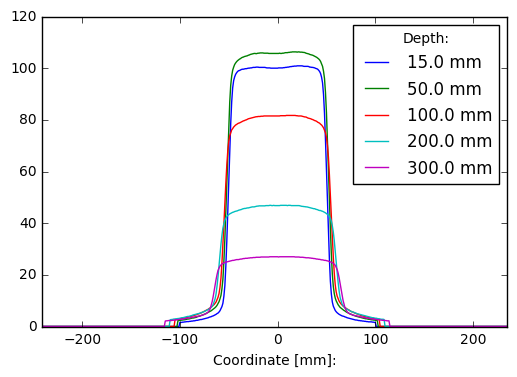

In [12]:
CC13_df['Crossline']['100 x 100 mm'].plot() # as multiindex index like this

## Comparison of profiles at field 10x10 cm

http://stackoverflow.com/questions/20073017/ipython-matplotlib-return-subplot-from-function

In [108]:
# depths = Diode_df.columns.get_level_values(2).unique()  #get the depths
depths = ['15.0 mm','50.0 mm', '100.0 mm', '200.0 mm', '300.0 mm']  # puth the depths in order
print('depths')
print(depths)

#all_fields = set(Diode_df.columns.get_level_values(1))  |  set(MicroDiamond_df.columns.get_level_values(1)) | set(CC13_df.columns.get_level_values(1))
#print(all_fields) # return the set of depths)

print('Fields in all')
intersect_fields = list(set(Diode_df.columns.get_level_values(1))  &  set(MicroDiamond_df.columns.get_level_values(1)) & set(CC13_df.columns.get_level_values(1)))
#print(intersect_fields) 

fields = ['40 x 40 mm', '100 x 100 mm', '200 x 200 mm']
fields

depths
['15.0 mm', '50.0 mm', '100.0 mm', '200.0 mm', '300.0 mm']
Fields in all


['40 x 40 mm', '100 x 100 mm', '200 x 200 mm']

Helper function to return a subplot

In [101]:
def plot_profile(field_size, depth, plot_xmin, plot_xlim, ax=None):   # return a fig object
    if ax is None:
        ax = plt.gca()
    trace1 = Diode_df['Crossline'][field_size][depth]
    trace2 = MicroDiamond_df['Crossline'][field_size][depth]
    trace3 = CC13_df['Crossline'][field_size][depth]

    ax.plot(trace1, color='red', label='Diode')
    ax.plot(trace2, color='green', label='MicroDiamond')
    ax.plot(trace3, color='black', label='CC13')

    ax.set_title('Field %s, depth %s' % (field_size, depth))
    ax.axis(xmin=plot_xmin,xmax=plot_xlim)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return ax

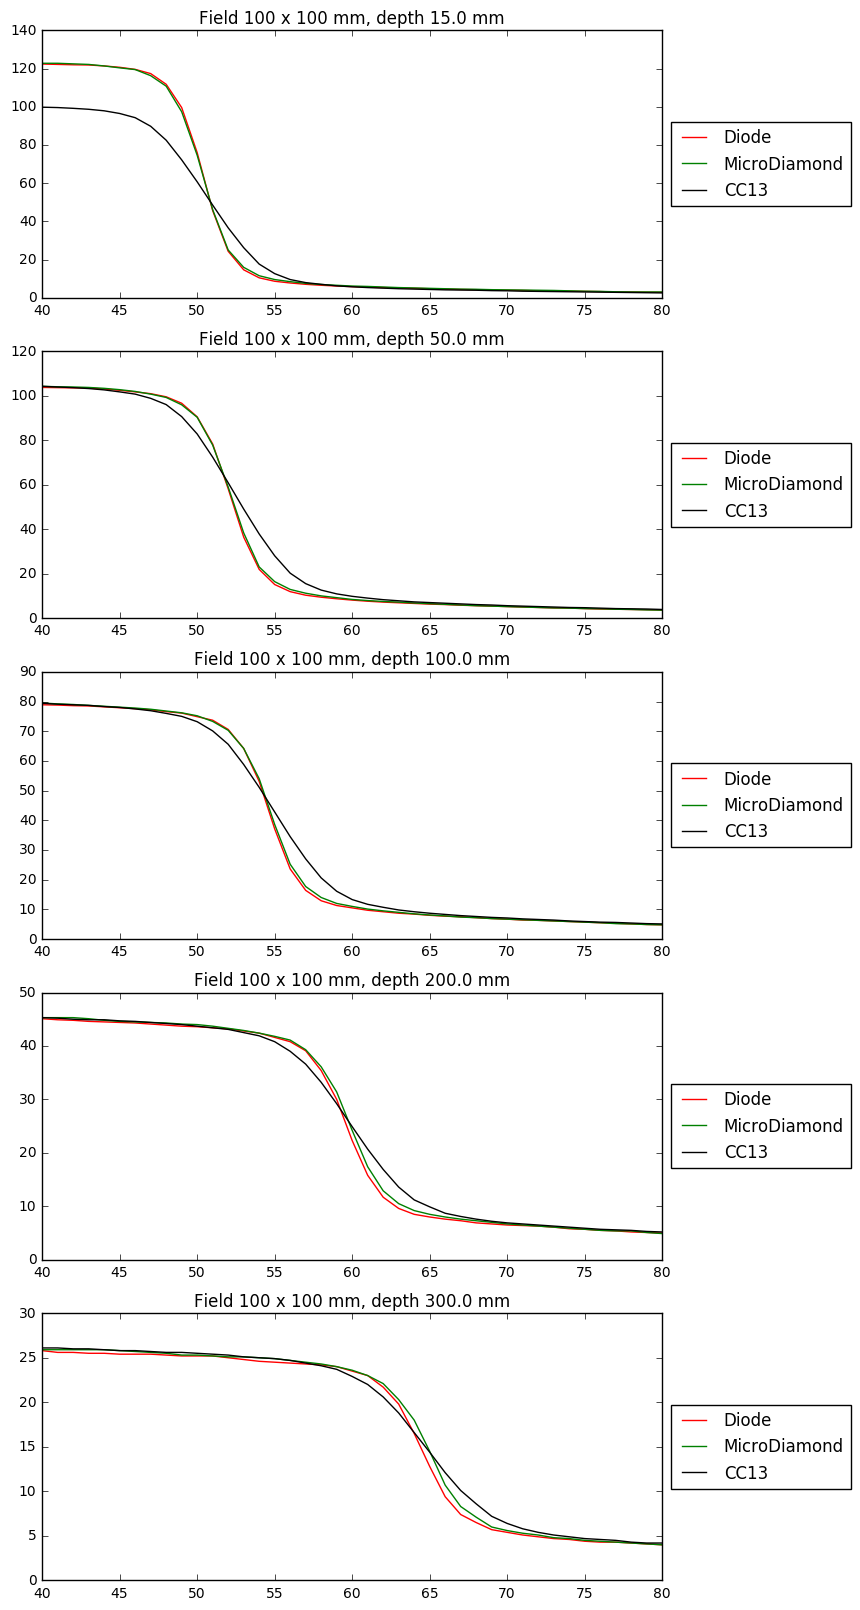

In [111]:
fig_width = 8
fig_height = 20
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1,  figsize=(fig_width,fig_height))  #sharex=True,

plot_profile('100 x 100 mm', '15.0 mm', 40, 80, ax1)
plot_profile('100 x 100 mm', '50.0 mm', 40, 80, ax2)
plot_profile('100 x 100 mm', '100.0 mm', 40, 80, ax3)
plot_profile('100 x 100 mm', '200.0 mm', 40, 80, ax4)
plot_profile('100 x 100 mm', '300.0 mm', 40, 80, ax5)

## Plot 1 field with depth

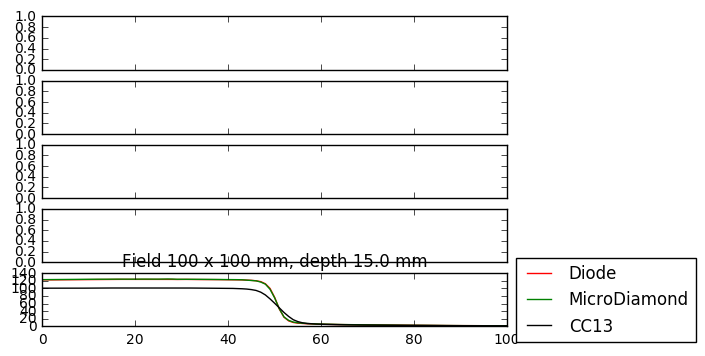

In [51]:
f, axarr = plt.subplots(len(depths), sharex=True)
axarr[0] = plot_profile('100 x 100 mm', '15.0 mm', 0, 100)

0
1
2
3
4


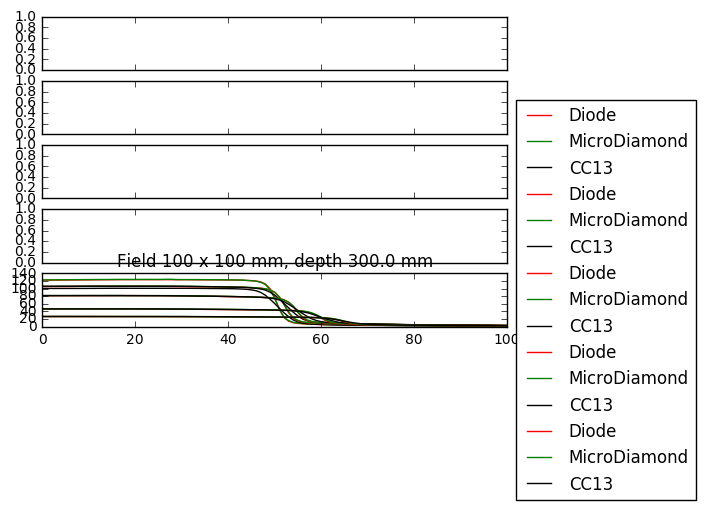

In [55]:
f, axarr = plt.subplots(len(depths), sharex=True)

for i, depth in enumerate(depths):
    print(i)
    axarr[4-i] = plot_profile('100 x 100 mm', depth, 0, 100)

## Unused

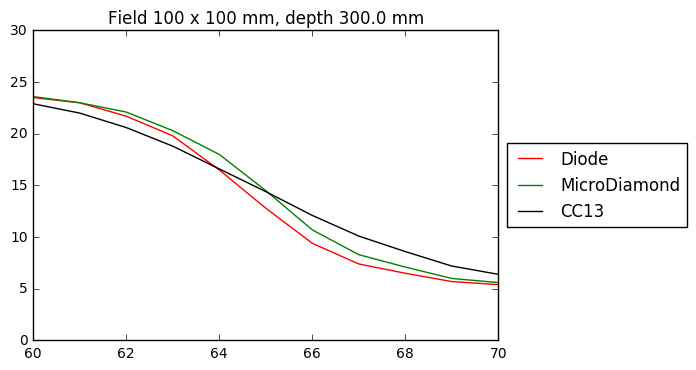

In [74]:
def plot_profile(field_size, depth, plot_xmin, plot_xlim):
    trace1 = Diode_df['Crossline'][field_size][depth]
    trace2 = MicroDiamond_df['Crossline'][field_size][depth]
    trace3 = CC13_df['Crossline'][field_size][depth]
    #mean_trace = (trace1 + trace2 + trace3)/3.

    plt.plot(trace1, color='red', label='Diode')
    plt.plot(trace2, color='green', label='MicroDiamond')
    plt.plot(trace3, color='black', label='CC13')
    #plt.plot(mean_trace, color='blue', label='Mean')

    plt.title('Field %s, depth %s' % (field_size, depth))
    plt.xlim( [plot_xmin,plot_xlim] ) 
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
    
plot_profile(field_size = '100 x 100 mm', depth = '300.0 mm', plot_xmin = 60, plot_xlim = 70)